In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

from EEGNET import EEGNet
from DeepConvNet import DeepConvNet
from utils import read_bci_data, train_nn, plot_results

In [2]:
# histories
history_eeg = [None, None, None]
history_deep = [None, None, None]

# training settings
batch_size =128
epochs = 800
loss_func = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
# load data
train_data, train_label, test_data, test_label = read_bci_data()

train_dataset = TensorDataset(torch.Tensor(train_data),
                              torch.Tensor(train_label))
test_dataset = TensorDataset(torch.Tensor(test_data), torch.Tensor(test_label))

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
)

# EEGNet

In [24]:
lr = 0.001
dropout = 0.5

In [5]:
eeg_net_relu = EEGNet(activation='ReLU', dropout=dropout)
eeg_net_relu = eeg_net_relu.to(device)
history = train_nn(model=eeg_net_relu, epochs=epochs,
                   optimizer=optim.Adam(eeg_net_relu.parameters(), lr=lr),
                   loss_func=loss_func, train_loader=train_loader, test_loader=test_loader, device=device)
history_eeg[0] = history

100%|##########| 800/800 [02:00<00:00,  6.63 epochs/s, train_loss=0.0837, train_acc=96.85, test_loss=0.3168, test_acc=88.43]


In [25]:
eeg_net_leaky_relu = EEGNet(activation='LeakyReLU', dropout=dropout)
eeg_net_leaky_relu = eeg_net_leaky_relu.to(device)
history = train_nn(model=eeg_net_leaky_relu, epochs=epochs,
                   optimizer=optim.Adam(eeg_net_leaky_relu.parameters(), lr=lr),
                   loss_func=loss_func, train_loader=train_loader, test_loader=test_loader, device=device)
history_eeg[1] = history

100%|##########| 800/800 [02:01<00:00,  6.60 epochs/s, train_loss=0.0935, train_acc=96.85, test_loss=0.3566, test_acc=87.96]


In [32]:
eeg_net_elu = EEGNet(activation='ELU', dropout=dropout)
eeg_net_elu = eeg_net_elu.to(device)
history = train_nn(model=eeg_net_elu, epochs=epochs,
                   optimizer=optim.Adam(eeg_net_elu.parameters(), lr=lr),
                   loss_func=loss_func, train_loader=train_loader, test_loader=test_loader, device=device)
history_eeg[2] = history

100%|##########| 800/800 [02:00<00:00,  6.61 epochs/s, train_loss=0.1153, train_acc=94.54, test_loss=0.4479, test_acc=85.65]


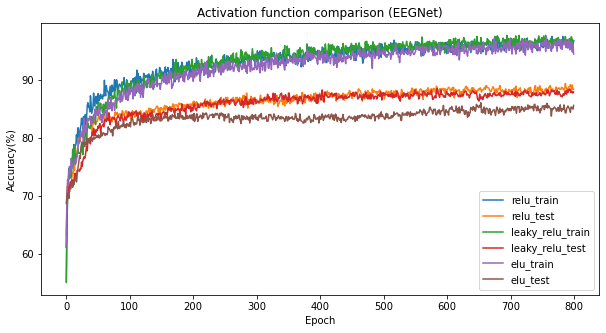

In [112]:
plot_results(history_eeg, ['relu', 'leaky_relu', 'elu'], "Activation function comparison (EEGNet)")

In [9]:
print(eeg_net_relu)

EEGNet(
  (firstConv): Sequential(
    (0): Conv2d(1, 16, kernel_size=(1, 51), stride=(1, 1), padding=(0, 25), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (depthwiseConv): Sequential(
    (0): Conv2d(16, 32, kernel_size=(2, 1), stride=(1, 1), groups=16, bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0)
    (4): Dropout(p=0.5, inplace=False)
  )
  (separableConv): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 15), stride=(1, 1), padding=(0, 7), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): AvgPool2d(kernel_size=(1, 8), stride=(1, 8), padding=0)
    (4): Dropout(p=0.5, inplace=False)
  )
  (classify): Sequential(
    (0): Linear(in_features=736, out_features=2, bias=True)
  )
)


In [22]:
save_file_name = 'eeg_net_relu.pkl'
# torch.save(eeg_net_relu.state_dict(), save_file_name)

In [26]:
save_file_name = 'eeg_net_leaky_relu.pkl'
# torch.save(eeg_net_leaky_relu.state_dict(), save_file_name)

In [34]:
save_file_name = 'eeg_net_elu.pkl'
# torch.save(eeg_net_elu.state_dict(), save_file_name)

# DeepConvNet

In [80]:
lr = 0.001
dropout = 0.5

In [81]:
deep_conv_net_relu = DeepConvNet(activation='ReLU', dropout=dropout)
deep_conv_net_relu = deep_conv_net_relu.to(device)
history = train_nn(model=deep_conv_net_relu, epochs=epochs,
                   optimizer=optim.Adam(deep_conv_net_relu.parameters(), lr=lr),
                   loss_func=loss_func, train_loader=train_loader, test_loader=test_loader, device=device)
history_deep[0] = history

100%|##########| 800/800 [03:36<00:00,  3.69 epochs/s, train_loss=0.0343, train_acc=98.80, test_loss=0.7290, test_acc=82.13]


In [82]:
deep_conv_net_leaky_relu = DeepConvNet(activation='LeakyReLU', dropout=dropout)
deep_conv_net_leaky_relu = deep_conv_net_leaky_relu.to(device)
history = train_nn(model=deep_conv_net_leaky_relu, epochs=epochs,
                   optimizer=optim.Adam(deep_conv_net_leaky_relu.parameters(), lr=lr),
                   loss_func=loss_func, train_loader=train_loader, test_loader=test_loader, device=device)
history_deep[1] = history

100%|##########| 800/800 [03:36<00:00,  3.69 epochs/s, train_loss=0.0356, train_acc=98.70, test_loss=0.6808, test_acc=82.22]


In [83]:
deep_conv_net_elu = DeepConvNet(activation='ELU', dropout=dropout)
deep_conv_net_elu = deep_conv_net_elu.to(device)
history = train_nn(model=deep_conv_net_elu, epochs=epochs,
                   optimizer=optim.Adam(deep_conv_net_elu.parameters(), lr=lr),
                   loss_func=loss_func, train_loader=train_loader, test_loader=test_loader, device=device)
history_deep[2] = history

100%|##########| 800/800 [03:37<00:00,  3.68 epochs/s, train_loss=0.0389, train_acc=98.98, test_loss=1.3174, test_acc=80.65]


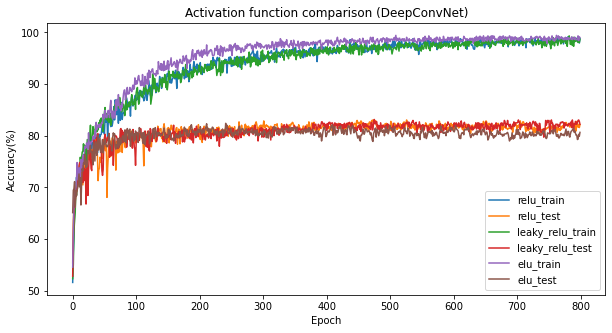

In [111]:
plot_results(history_deep, ['relu', 'leaky_relu', 'elu'], "Activation function comparison (DeepConvNet)")

In [85]:
print(deep_conv_net_relu)

DeepConvNet(
  (conv_1): Sequential(
    (0): Conv2d(1, 25, kernel_size=(1, 5), stride=(1, 1))
    (1): Conv2d(25, 25, kernel_size=(2, 1), stride=(1, 1))
    (2): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.5, inplace=False)
  )
  (conv_2): Sequential(
    (0): Conv2d(25, 50, kernel_size=(1, 5), stride=(1, 1))
    (1): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.5, inplace=False)
  )
  (conv_3): Sequential(
    (0): Conv2d(50, 100, kernel_size=(1, 5), stride=(1, 1))
    (1): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=Fa

In [89]:
save_file_name = 'deep_conv_net_relu.pkl'
# torch.save(deep_conv_net_relu.state_dict(), save_file_name)

In [90]:
save_file_name = 'deep_conv_net_leaky_relu.pkl'
# torch.save(deep_conv_net_leaky_relu.state_dict(), save_file_name)

In [91]:
save_file_name = 'deep_conv_net_elu.pkl'
# torch.save(deep_conv_net_elu.state_dict(), save_file_name)

# Discussions

## Dropout Ratio

In [102]:
lr = 0.001
history_eeg_drop = [None, history_eeg[0], None]
history_deep_drop = [None, history_deep[0], None]

### EEGNet 0.25

In [103]:
eeg_net_relu_drop_25 = EEGNet(activation='ReLU', dropout=0.25)
eeg_net_relu_drop_25 = eeg_net_relu_drop_25.to(device)
history = train_nn(model=eeg_net_relu_drop_25, epochs=epochs,
                   optimizer=optim.Adam(eeg_net_relu_drop_25.parameters(), lr=lr),
                   loss_func=loss_func, train_loader=train_loader, test_loader=test_loader, device=device)
history_eeg_drop[0] = history

100%|##########| 800/800 [02:01<00:00,  6.59 epochs/s, train_loss=0.0210, train_acc=99.17, test_loss=0.5631, test_acc=86.85]


### EEGNet 0.75

In [104]:
eeg_net_relu_drop_75 = EEGNet(activation='ReLU', dropout=0.75)
eeg_net_relu_drop_75 = eeg_net_relu_drop_75.to(device)
history = train_nn(model=eeg_net_relu_drop_75, epochs=epochs,
                   optimizer=optim.Adam(eeg_net_relu_drop_75.parameters(), lr=lr),
                   loss_func=loss_func, train_loader=train_loader, test_loader=test_loader, device=device)
history_eeg_drop[2] = history

100%|##########| 800/800 [02:01<00:00,  6.58 epochs/s, train_loss=0.2534, train_acc=89.81, test_loss=0.2971, test_acc=87.31]


## plot

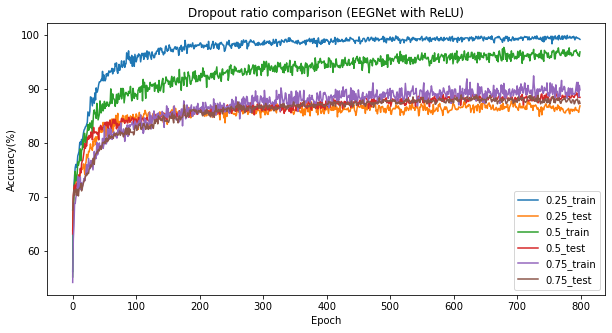

In [110]:
plot_results(history_eeg_drop, ['0.25', '0.5', '0.75'], "Dropout ratio comparison (EEGNet with ReLU)")

### DeepConvNet 0.25

In [106]:
deep_conv_net_relu_drop_25 = DeepConvNet(activation='ReLU', dropout=0.25)
deep_conv_net_relu_drop_25 = deep_conv_net_relu_drop_25.to(device)
history = train_nn(model=deep_conv_net_relu_drop_25, epochs=epochs,
                   optimizer=optim.Adam(deep_conv_net_relu_drop_25.parameters(), lr=lr),
                   loss_func=loss_func, train_loader=train_loader, test_loader=test_loader, device=device)
history_deep_drop[0] = history

100%|##########| 800/800 [03:37<00:00,  3.68 epochs/s, train_loss=0.0041, train_acc=99.81, test_loss=1.8461, test_acc=78.61] 


### DeepConvNet 0.75

In [107]:
deep_conv_net_relu_drop_75 = DeepConvNet(activation='ReLU', dropout=0.75)
deep_conv_net_relu_drop_75 = deep_conv_net_relu_drop_75.to(device)
history = train_nn(model=deep_conv_net_relu_drop_75, epochs=epochs,
                   optimizer=optim.Adam(deep_conv_net_relu_drop_75.parameters(), lr=lr),
                   loss_func=loss_func, train_loader=train_loader, test_loader=test_loader, device=device)
history_deep_drop[2] = history

100%|##########| 800/800 [03:37<00:00,  3.69 epochs/s, train_loss=0.3531, train_acc=84.54, test_loss=0.4736, test_acc=78.06]


### plot

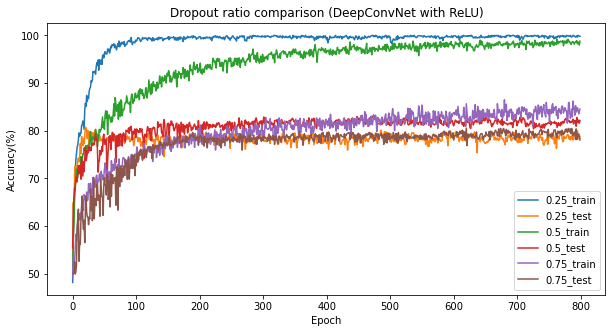

In [109]:
plot_results(history_deep_drop, ['0.25', '0.5', '0.75'], "Dropout ratio comparison (DeepConvNet with ReLU)")

## Learning Rate

In [113]:
history_eeg_lr = [None, None, None, history_eeg[0]]
dropout = 0.5
lrs = [0.1, 0.01, 0.0001]

In [114]:
for i, lr in enumerate(lrs):
    eeg_lr = EEGNet(activation='ReLU', dropout=dropout).to(device)
    history = train_nn(model=eeg_lr, epochs=epochs,
                   optimizer=optim.Adam(eeg_lr.parameters(), lr=lr),
                   loss_func=loss_func, train_loader=train_loader, test_loader=test_loader, device=device)
    history_eeg_lr[i] = history
    
history_eeg_lr[2], history_eeg_lr[3] = history_eeg_lr[3], history_eeg_lr[2]

100%|##########| 800/800 [02:00<00:00,  6.62 epochs/s, train_loss=0.2306, train_acc=90.37, test_loss=0.3486, test_acc=84.35]


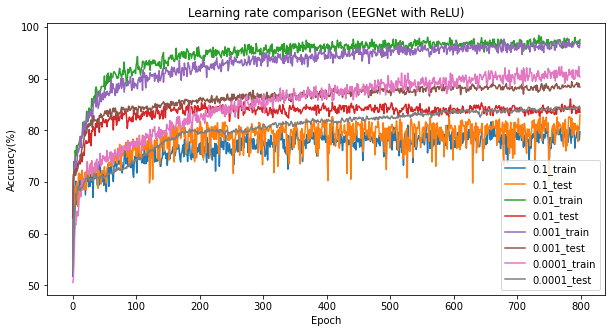

In [115]:
plot_results(history_eeg_lr, ['0.1', '0.01', '0.001', '0.0001'], "Learning rate comparison (EEGNet with ReLU)")